In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import control
from numpy import sin, cos, tan, pi
from control import TransferFunction as TF
import random_bode_generator as rbg

In [4]:
ls

accel_fb/  ATest.csv  digcomp_no_accelfb/  Untitled.ipynb


In [9]:
datafile = "ATest.csv"

In [10]:
data = np.loadtxt(datafile, skiprows=1, delimiter=',')

In [27]:
t = data[:,0]/1000
myt = [t.min(), t.max()]

In [21]:
def load_column_labels(datafile):
    f = open(datafile, 'r')
    label_str = f.readline()
    f.close()
    label_str = label_str.strip()
    labels = label_str.split(',')
    return labels


def find_col(mylabels, vib_label="vib_on"):
    msg = "%s not in column labels:\n %s" % (vib_label, mylabels)
    assert vib_label in mylabels, msg
    vib_ind = mylabels.index(vib_label)
    return vib_ind

In [22]:
mylabels

['t_ms', 'sum_junct', 'D', 'sat', 'G', 'G2', 'U', 'sum_junct2', 'Dz']

In [23]:
mylabels = load_column_labels(datafile)
accel_col = find_col(mylabels, "G2")
enc_col = find_col(mylabels, "G")
u_col = find_col(mylabels, "U")

In [24]:
u_data = data[:,u_col]
enc_data = data[:,enc_col]
accel_data = data[:,accel_col]
on_ind = np.where(u_data != 0)[0][0]#<-- vib. suppress on

### Software zero accelerometer based on last 1 second of data

In [32]:
offset = np.mean(accel_data[-500:])
offset

120.738

In [33]:
accel_data -= offset

In [34]:
def enc_settling_lines():
    plt.plot(myt, [99,99],'k:')
    plt.plot(myt,[101,101],'k:')

In [35]:
def accel_settling_lines():
    mylim = 500
    plt.plot(myt, [-mylim,-mylim],'k:')
    plt.plot(myt,[mylim,mylim],'k:')

### Encoder error settling time

In [40]:
e_enc = u_data - enc_data

In [42]:
bad_inds = np.where(np.abs(e_enc) > 1)[0]# not settled
settle_ind = bad_inds[-1]+1# one higher than last unsettled index
settle_ind

169

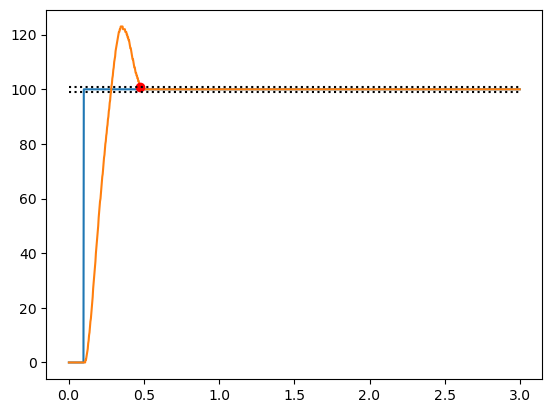

In [43]:
plt.figure()
plt.plot(t, u_data, t, enc_data)
plt.plot(t[settle_ind], enc_data[settle_ind],'ro')
enc_settling_lines()

(90.0, 110.0)

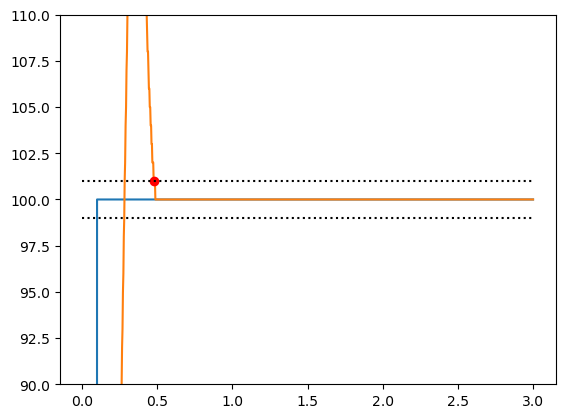

In [52]:
plt.figure()
plt.plot(t, u_data, t, enc_data)
plt.plot(t[settle_ind], enc_data[settle_ind],'ro')
enc_settling_lines()
plt.ylim([90,110])

### Encoder Settling Time

In [53]:
print("encoder settling time: %0.4g" % t[settle_ind])

encoder settling time: 0.4773


### Accel Settling Time

In [45]:
bad_inds2 = np.where(np.abs(accel_data) > 500)[0]# not settled
settle_ind2 = bad_inds2[-1]+1# one higher than last unsettled index
settle_ind2

628

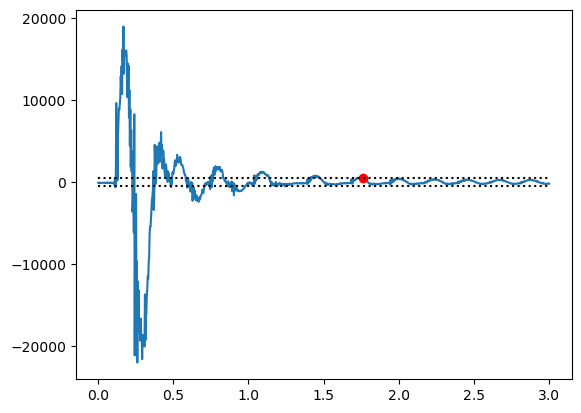

In [46]:
plt.figure()
plt.plot(t,accel_data)
plt.plot(t[settle_ind2],accel_data[settle_ind2],'ro')
accel_settling_lines()

(-1000.0, 1000.0)

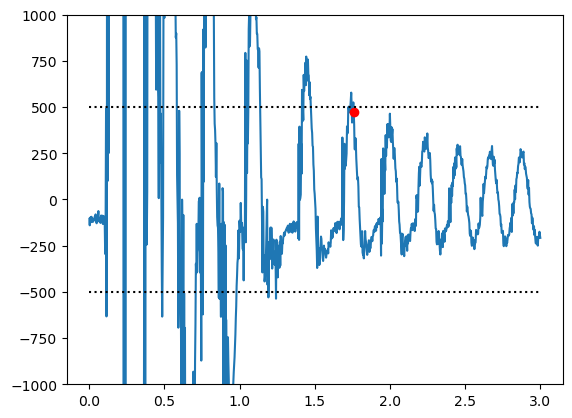

In [50]:
plt.figure()
plt.plot(t,accel_data)
plt.plot(t[settle_ind2],accel_data[settle_ind2],'ro')
accel_settling_lines()
plt.ylim([-1000,1000])

### Accelerometer Settling Time

In [51]:
print("accel settling time: %0.4g" % t[settle_ind2])

accel settling time: 1.759
